In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.impute import MissingIndicator, SimpleImputer, KNNImputer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, cross_validate
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
def plot_feature_importances(model):
    n_features = X_train_processed.shape[1]
    plt.figure(figsize=(12,50))
    plt.barh(range(n_features), model.feature_importances_, align='edge') 
    plt.yticks(np.arange(n_features), X_train_processed.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')



In [5]:
def evaluation(y, y_hat, title = 'Confusion Matrix'):
    '''takes in true values and predicted values.
    The function then prints out a classifcation report
    as well as a confusion matrix using seaborn's heatmap.'''
    cm = confusion_matrix(y, y_hat)
    precision = precision_score(y, y_hat, average = 'weighted')
    recall = recall_score(y, y_hat, average = 'weighted')
    accuracy = accuracy_score(y,y_hat)
    print(classification_report(y, y_hat))
    print('Accurancy: ', accuracy)
    sns.heatmap(cm,  cmap= 'Greens', annot=True)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.title(title)
    plt.show()

In [6]:
# train = f.load_processed_train_df()
# test = f.load_test_df()
train = pd.read_csv('../data/processed_data.csv')
train.permit = train.permit.astype(str)

In [31]:

train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    59400 non-null  int64  
 1   id                            59400 non-null  int64  
 2   amount_tsh                    59400 non-null  float64
 3   date_recorded                 59400 non-null  object 
 4   gps_height                    59400 non-null  int64  
 5   longitude                     59400 non-null  float64
 6   latitude                      59400 non-null  float64
 7   num_private                   59400 non-null  int64  
 8   basin                         59400 non-null  object 
 9   district_code                 59400 non-null  int64  
 10  ward                          59400 non-null  object 
 11  population                    59400 non-null  int64  
 12  public_meeting                59400 non-null  object 
 13  p

In [7]:
X = train.drop(['id', 'status_group', 'status', 'date_recorded'], axis=1)
y = train.status
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
ohe_features = ['funder/installer', 'region_bins',
               'public_meeting', 'lga_coded',
               'scheme_management/management', 'permit', 
               'extraction_type/group/class', 
               'payment', 'quality_group',
               'quantity', 'source_type', 'waterpoint_type/group']

In [9]:
cont_features = ['gps_height', 'population',
                 'construction_year']

decade_features = ['2000-2010', '1990-2000', '1980-1990',
                   '2010-2020', '1970-1980', '1960-1970']

In [10]:
X_train_ohe = X_train[ohe_features]
X_test_ohe = X_test[ohe_features]
X_train_cont = X_train[cont_features].astype(float)
X_test_cont = X_test[cont_features].astype(float)

In [11]:
X_train_index = X_train.index
X_test_index = X_test.index

In [12]:
ohe = OneHotEncoder()
ss = StandardScaler()
X_train_encoded = ohe.fit_transform(X_train_ohe)
X_test_encoded = ohe.transform(X_test_ohe)
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train_cont), columns=X_train[cont_features].columns, index=X_train_index)
X_test_scaled = pd.DataFrame(ss.transform(X_test_cont), columns=X_test[cont_features].columns, index=X_test_index)

In [13]:
train_columns = ohe.get_feature_names(input_features=X_train_ohe.columns)
test_columns = ohe.get_feature_names(input_features=X_test_ohe.columns)
X_train_processed = pd.DataFrame(X_train_encoded.todense(), columns=train_columns, index=X_train_index)
X_test_processed = pd.DataFrame(X_test_encoded.todense(), columns=test_columns, index=X_test_index)

In [14]:
X_train_all = pd.concat([X_train_scaled, X_train_processed], axis=1)
X_test_all = pd.concat([X_test_scaled, X_test_processed], axis=1)


In [15]:
X_train_all = X_train_all.join(X_train[decade_features])
X_test_all = X_test_all.join(X_test[decade_features])

In [16]:
X_train_all.isna().sum()

gps_height                  0
population                  0
construction_year           0
funder/installer_adb/dwe    0
funder/installer_amref      0
                           ..
1990-2000                   0
1980-1990                   0
2010-2020                   0
1970-1980                   0
1960-1970                   0
Length: 145, dtype: int64

In [17]:
a = y_train[y_train==0].index
b = y_train[y_train==1].index
c = y_train[y_train==2].index

print(len(a))
print(len(b))
print(len(c))

17146
3243
24161


In [18]:
a_indexes = np.random.choice(a, size=18000-17146, replace=True)
b_indexes = np.random.choice(b, size=18000-3243, replace=True)

In [19]:
y_train_bal = pd.concat([y_train.loc[a_indexes], y_train.loc[b_indexes], y_train])

In [20]:
X_train_all_bal = pd.concat([X_train_all.loc[a_indexes], X_train_all.loc[b_indexes], X_train_all])

In [21]:
a = y_train_bal[y_train==0].index
b = y_train_bal[y_train==1].index
c = y_train_bal[y_train==2].index

print(len(a))
print(len(b))
print(len(c))

18000
18000
24161


In [22]:
y_train_bal.index.value_counts()

50762    16
44932    16
30996    14
18948    13
23614    13
         ..
22238     1
20189     1
18140     1
28377     1
0         1
Length: 44550, dtype: int64

In [23]:
X_train_all_bal.index.value_counts()

50762    16
44932    16
30996    14
18948    13
23614    13
         ..
22238     1
20189     1
18140     1
28377     1
0         1
Length: 44550, dtype: int64

In [24]:
import xgboost as xgb

In [27]:
clf = xgb.XGBClassifier(objective='multi:softmax', verbosity=2, num_classes=3, n_estimators=1000)

In [28]:
clf.fit(X_train_all_bal, y_train_bal)

[01:17:44] WARNING: /workspace/src/learner.cc:480: 
Parameters: { num_classes } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:17:44] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 110 extra nodes, 0 pruned nodes, max_depth=6
[01:17:44] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[01:17:44] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 0 pruned nodes, max_depth=6
[01:17:45] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 0 pruned nodes, max_depth=6
[01:17:45] INFO: /workspace/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=6
[01:17:45] INFO: /workspace/src/tree/updater_prune.cc:98:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_classes=3, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=2)

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      5678
           1       0.34      0.50      0.40      1074
           2       0.81      0.82      0.81      8098

    accuracy                           0.76     14850
   macro avg       0.66      0.69      0.67     14850
weighted avg       0.78      0.76      0.77     14850

Accurancy:  0.7649158249158249


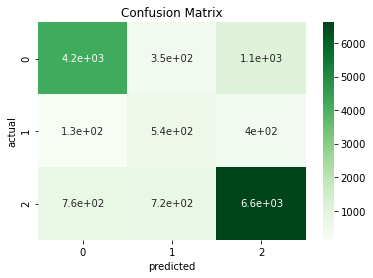

In [30]:
evaluation(y_test, clf.predict(X_test_all))

In [ ]:
confusion_matrix(y_train, rf.predict(X_train_all))

In [ ]:
confusion_matrix(y_test, rf.predict(X_test_all))

# Balanced

In [65]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train_all_bal, y_train_bal)

RandomForestClassifier(n_estimators=1000)

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      5678
           1       0.31      0.51      0.39      1074
           2       0.82      0.78      0.80      8098

    accuracy                           0.75     14850
   macro avg       0.64      0.68      0.66     14850
weighted avg       0.78      0.75      0.76     14850

Accurancy:  0.7522558922558923


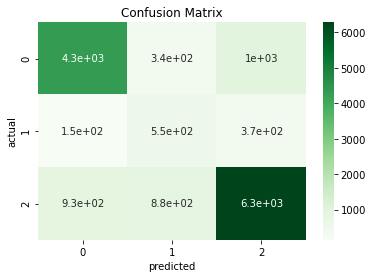

In [66]:
evaluation(y_test, rf.predict(X_test_all))

In [67]:
confusion_matrix(y_train, rf.predict(X_train_all))

array([[15996,   621,   529],
       [   24,  3160,    59],
       [  526,  1606, 22029]])

In [68]:
confusion_matrix(y_test, rf.predict(X_test_all))

array([[4337,  343,  998],
       [ 150,  553,  371],
       [ 934,  883, 6281]])